In [10]:
!pip install opendatasets
!pip install semopy pandas

In [1]:
import opendatasets as od
import pandas as pd

# Download the dataset
od.download("https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021")

# Read the CSV
file = "world-happiness-report-2021/world-happiness-report-2021.csv"
df = pd.read_csv(file)

# Display first 5 rows
display(df.head())


Skipping, found downloaded files in ".\world-happiness-report-2021" (use force=True to force download)


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [2]:
df = df.rename(columns={
    "Ladder score": "Ladder_score",
    'Logged GDP per capita': 'Logged_GDP_per_capita',
    'Social support': 'Social_support',
    'Healthy life expectancy': 'Healthy_life_expectancy',
    'Freedom to make life choices': 'Freedom_to_make_life_choices',
    'Perceptions of corruption': 'Perceptions_of_corruption'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged_GDP_per_capita                       149 non-null    float64
 7   Social_support                              149 non-null    float64
 8   Healthy_life_expectancy                     149 non-null    float64
 9   Freedom_to_make_life_choices                149 non-null    float64
 10  Generosity    

In [41]:
import pandas as pd
df = df.rename(columns={})
# Select variables
cols = [
    "Ladder_score","Logged_GDP_per_capita", "Generosity",
    "Social_support", "Healthy_life_expectancy",
    "Freedom_to_make_life_choices", "Perceptions_of_corruption"
]

corr_culomns_1 = df[cols]

                              Ladder_score  Logged_GDP_per_capita  Generosity  \
Ladder_score                      1.000000               0.789760   -0.017799   
Logged_GDP_per_capita             0.789760               1.000000   -0.199286   
Generosity                       -0.017799              -0.199286    1.000000   
Social_support                    0.756888               0.785299   -0.114946   
Healthy_life_expectancy           0.768099               0.859461   -0.161750   
Freedom_to_make_life_choices      0.607753               0.432323    0.169437   
Perceptions_of_corruption        -0.421140              -0.342337   -0.163962   

                              Social_support  Healthy_life_expectancy  \
Ladder_score                        0.756888                 0.768099   
Logged_GDP_per_capita               0.785299                 0.859461   
Generosity                         -0.114946                -0.161750   
Social_support                      1.000000               

In [73]:
# Define the SEM model specification
# Null hypothesis: the happiness of a nation is driven by economic status, democracy and quality of life
model_spec = """
# Measurement model
Democracy =~ Freedom_to_make_life_choices + Perceptions_of_corruption 
Quality_of_Life =~  Healthy_life_expectancy + Social_support + Logged_GDP_per_capita
Happiness =~ Ladder_score

Happiness ~ Quality_of_Life
Democracy ~ Quality_of_Life

# Correlations (between related observed variables)
Healthy_life_expectancy ~~ Social_support
Freedom_to_make_life_choices ~~ Ladder_score
Logged_GDP_per_capita ~~ Ladder_score
Perceptions_of_corruption ~~ Freedom_to_make_life_choices
"""

model = semopy.Model(model_spec)
model.fit(data_scaled)
display(model.inspect())

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Happiness,~,Quality_of_Life,0.908972,0.078181,11.626577,0.0
1,Democracy,~,Quality_of_Life,0.549402,0.082302,6.67545,0.0
2,Freedom_to_make_life_choices,~,Democracy,1.000000,-,-,-
3,Perceptions_of_corruption,~,Democracy,-0.702771,0.164988,-4.25953,0.00002
4,Healthy_life_expectancy,~,Quality_of_Life,1.000000,-,-,-
5,Social_support,~,Quality_of_Life,0.926674,0.06766,13.696027,0.0
6,Logged_GDP_per_capita,~,Quality_of_Life,0.988299,0.076379,12.939322,0.0
7,Ladder_score,~,Happiness,1.000000,-,-,-
8,Democracy,~~,Democracy,0.104600,0.045504,2.2987,0.021522
9,Happiness,~~,Happiness,0.095854,0.027068,3.541146,0.000398


SEM Model diagram saved as 'sem_model_4.png'.


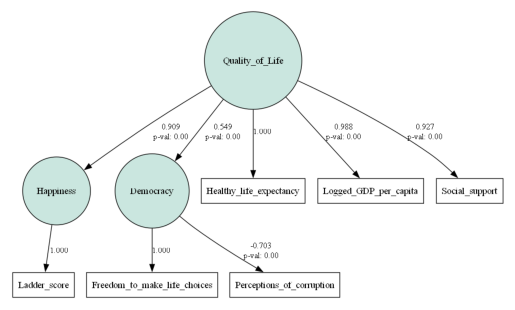

In [74]:
import semopy
semopy.semplot(model, 'sem_model.png')
print("SEM Model diagram saved as 'sem_model.png'.")
img = plt.imread('sem_model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [75]:
semopy.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,3,15,25.480551,0.000012,641.216616,0.964101,0.960262,0.801311,0.960262,0.820505,0.225015,35.657979,89.729013,0.17101
